<a href="https://colab.research.google.com/github/MichaelMohn/FinalProject/blob/master/Urinalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

Hello Grader! In order to run our project, you might need to upload our dataset. To do this, click on the folder icon on the left column. Once opened, a new row of icons should appear. Click on the upload button, and select the dataset we submitted.

## Data Cleaning and Exploration

This section of the project will focus on three areas:
1. Address any empty or incorrect data entries
2. Perform Feature Engineering
3. Address the Class Imbalance Problem

Shape of orignal dataset: (1436, 16)
Number of NaN values: 4
Shape after removing missing/NaN values and index column: (1432, 15)


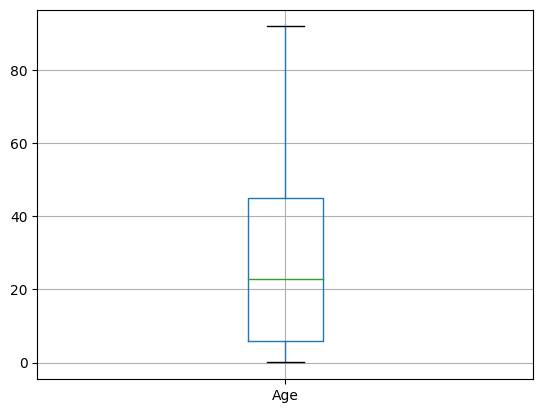

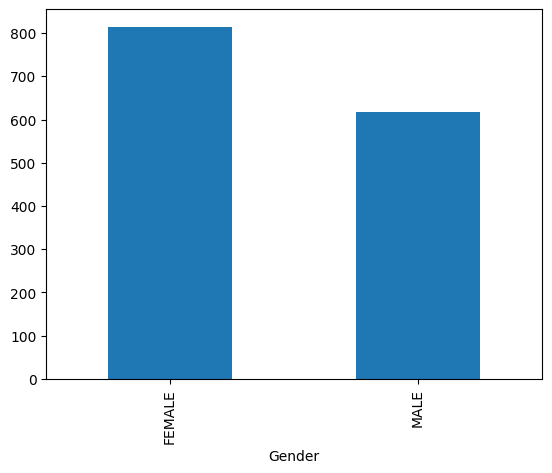

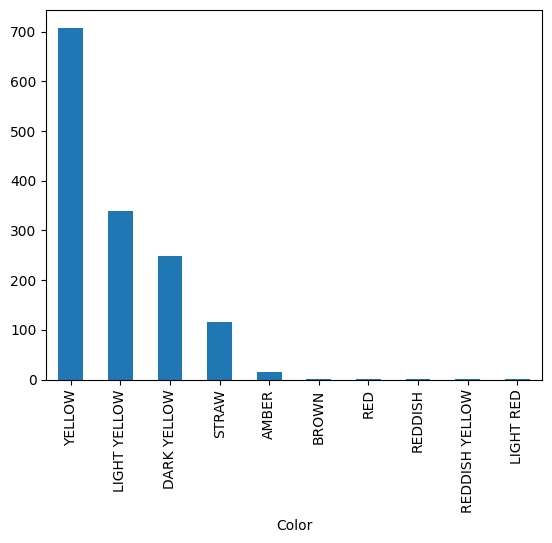

Color
YELLOW            708
LIGHT YELLOW      340
DARK YELLOW       248
STRAW             116
AMBER              15
BROWN               1
RED                 1
REDDISH             1
REDDISH YELLOW      1
LIGHT RED           1
Name: count, dtype: int64


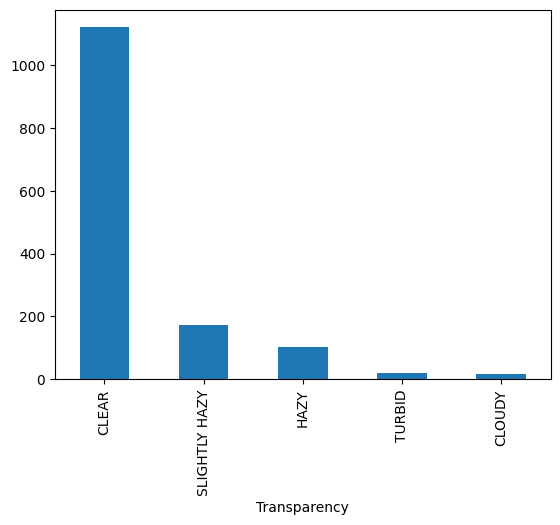

Transparency
CLEAR            1120
SLIGHTLY HAZY     172
HAZY              104
TURBID             20
CLOUDY             16
Name: count, dtype: int64


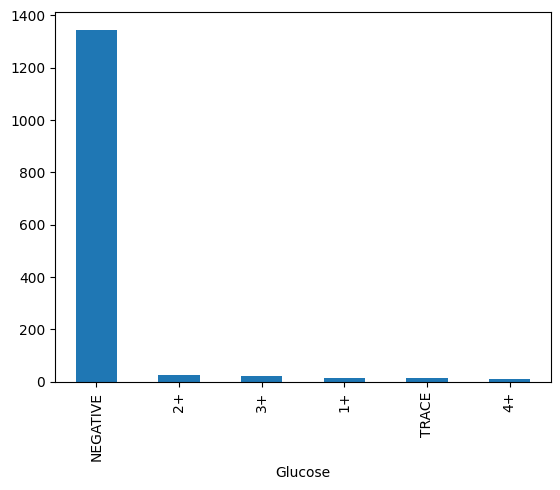

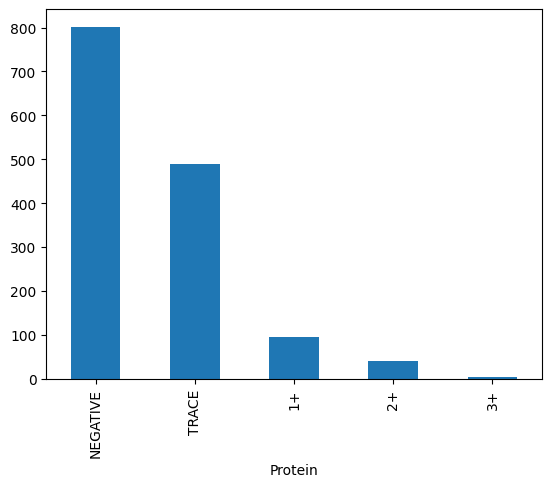

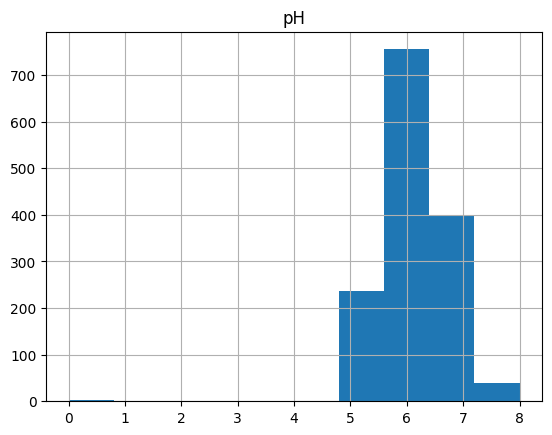

pH
6.0    755
6.5    304
5.0    236
7.0     96
7.5     27
8.0     12
0.0      2
Name: count, dtype: int64


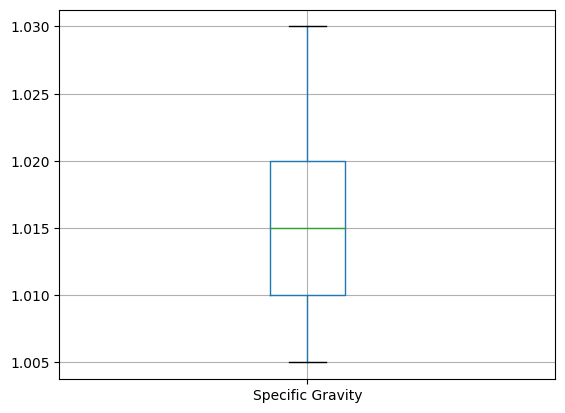

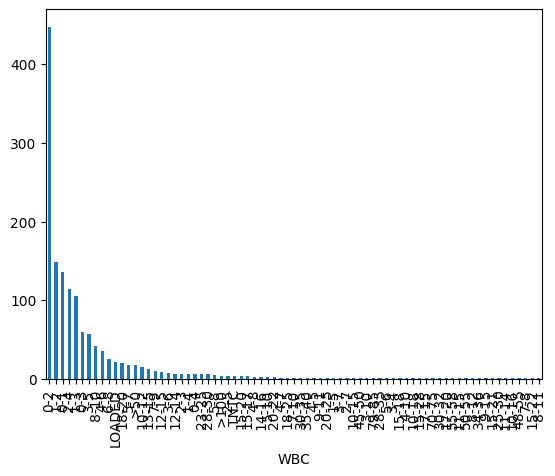

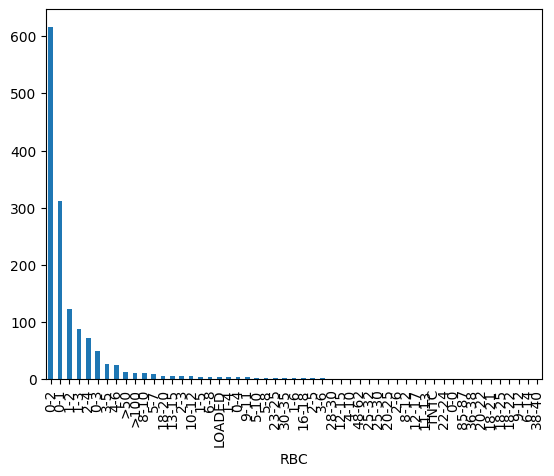

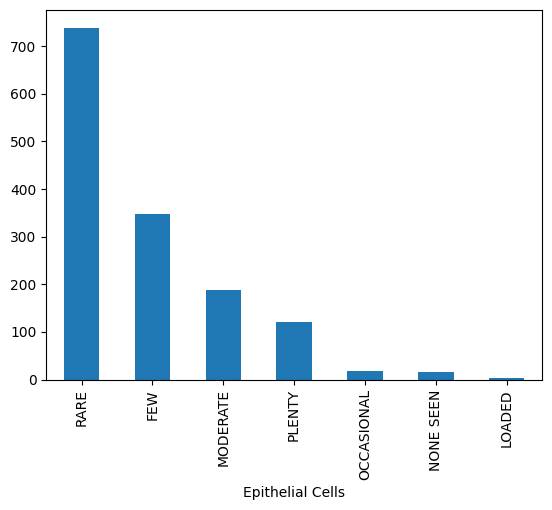

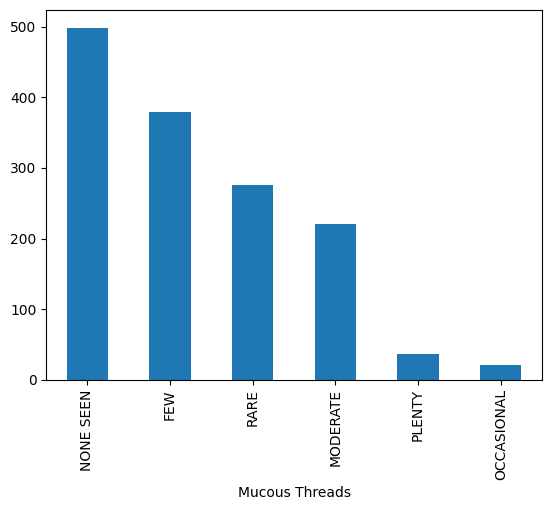

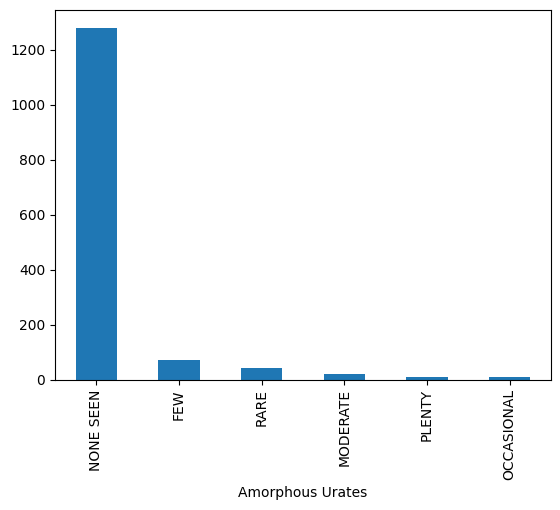

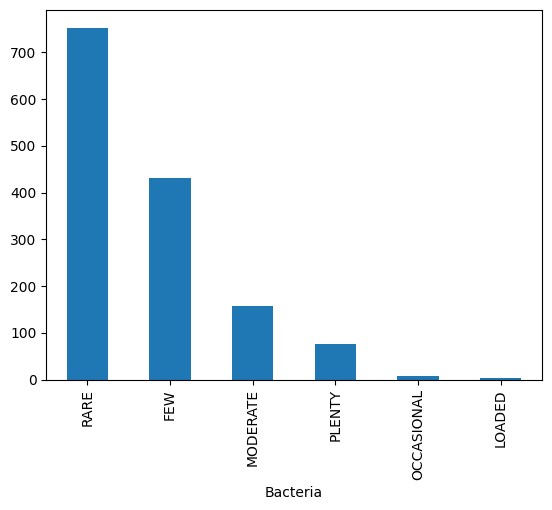

Shape before removing anomalies: (1432, 15)
Shape after removing anomalies: (1430, 15)


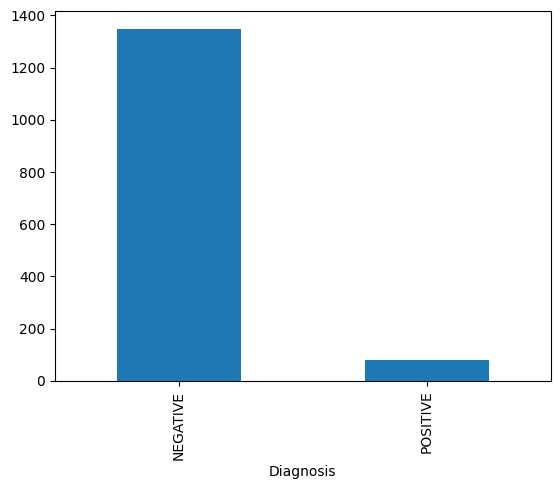

    Age  Gender         Color   Transparency   Glucose   Protein   pH  \
0  76.0  FEMALE  LIGHT YELLOW          CLEAR  NEGATIVE  NEGATIVE  5.0   
1   9.0    MALE   DARK YELLOW  SLIGHTLY HAZY  NEGATIVE        1+  5.0   
2  12.0    MALE  LIGHT YELLOW  SLIGHTLY HAZY  NEGATIVE     TRACE  5.0   
3  77.0    MALE         BROWN         CLOUDY  NEGATIVE        1+  6.0   
4  29.0  FEMALE        YELLOW           HAZY  NEGATIVE     TRACE  6.0   

   Specific Gravity  WBC     RBC Epithelial Cells Mucous Threads  \
0             1.010  1-3     0-2       OCCASIONAL           RARE   
1             1.030  1-3     0-2             RARE            FEW   
2             1.030  0-3     0-2             RARE            FEW   
3             1.020  5-8  LOADED             RARE           RARE   
4             1.025  1-4     0-2             RARE           RARE   

  Amorphous Urates    Bacteria Diagnosis  
0        NONE SEEN  OCCASIONAL  NEGATIVE  
1              FEW    MODERATE  NEGATIVE  
2         MODERATE     

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('Dataset.csv')
print('Shape of orignal dataset:', data.shape)

# Must drop column of record indices
data = data.drop(data.columns[0], axis=1)

# Count the number of missing/NaN values in each row and sum them
nan_count = data.isnull().sum().sum()
print('Number of NaN values:', nan_count)

# Since there are only 4 out of 1436 records with NaN values, we can simply remove them
data = data.dropna()
print('Shape after removing missing/NaN values and index column:', data.shape)

# Explore data by looking at the distribution of all features
features = data.drop('Diagnosis', axis=1)

features.boxplot('Age')
plt.show()

features['Gender'].value_counts().plot(kind='bar')
plt.show()

features['Color'].value_counts().plot(kind='bar')
plt.show()
print(features['Color'].value_counts()) #might delete

features['Transparency'].value_counts().plot(kind='bar')
plt.show()
print(features['Transparency'].value_counts()) #might delete

features['Glucose'].value_counts().plot(kind='bar')
plt.show()

features['Protein'].value_counts().plot(kind='bar')
plt.show()

features.hist('pH')
plt.show()
print(features['pH'].value_counts())

features.boxplot('Specific Gravity')
plt.show()

features['WBC'].value_counts().plot(kind='bar')
plt.show()

features['RBC'].value_counts().plot(kind='bar')
plt.show()

features['Epithelial Cells'].value_counts().plot(kind='bar')
plt.show()

features['Mucous Threads'].value_counts().plot(kind='bar')
plt.show()

features['Amorphous Urates'].value_counts().plot(kind='bar')
plt.show()

features['Bacteria'].value_counts().plot(kind='bar')
plt.show()

# Anomaly Detection: After looking at of the distributions of each feature, we see that there
# are 2 outliers that have a pH value of 0 while the other records have pH between 5.0 and 8.0.
print("Shape before removing anomalies:", data.shape)
data = data[data.pH != 0]
print("Shape after removing anomalies:", data.shape)
features = data.drop('Diagnosis', axis=1)

# Explore data by looking at distribution of labels
diagnosis = data['Diagnosis']
diagnosis.value_counts().plot(kind='bar')
plt.show()

print(data.head())


## Feature Engineering

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#I didn't know what to do with these columns but we should implement these at some point
data = data.drop(columns=['WBC', 'RBC'], axis=1)

data['Diagnosis'] = data['Diagnosis'].map({'POSITIVE': 1, 'NEGATIVE': 0})
data['Gender'] = data['Gender'].map({'MALE': 1, 'FEMALE': 0})

#One-Hot Encoding
data = pd.get_dummies(data, columns=['Color', 'Transparency', 'Glucose', 'Protein', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates', 'Bacteria'])
features = data.drop('Diagnosis', axis=1)
diagnosis = data['Diagnosis']

# Standardize the features
numpy_array_features = StandardScaler().fit_transform(features)
scaled_features = pd.DataFrame(numpy_array_features)
print("Scaled Features:")
print(scaled_features.head())

# Perform PCA dimesionality reduction on the scaled features
pca = PCA(n_components=0.95, svd_solver='full')
numpy_array_features_2 = pca.fit_transform(scaled_features)
pca_features = pd.DataFrame(numpy_array_features_2)
print("PCA Features:")
print(pca_features.head())

Scaled Features:
         0         1         2         3        4          5         6   \
0  2.077954 -0.871159 -1.759493 -0.801918 -0.10296  -0.026454 -0.456937   
1 -0.777592  1.147896 -1.759493  1.943128 -0.10296  -0.026454  2.188487   
2 -0.649731  1.147896 -1.759493  1.943128 -0.10296  -0.026454 -0.456937   
3  2.120575  1.147896 -0.089347  0.570605 -0.10296  37.802116 -0.456937   
4  0.074810 -0.871159 -0.089347  1.256866 -0.10296  -0.026454 -0.456937   

         7         8         9   ...        45        46        47        48  \
0 -0.026454  1.790498 -0.026454  ...  0.344871 -0.075006 -0.088045 -0.173952   
1 -0.026454 -0.558504 -0.026454  ... -2.899637 -0.075006 -0.088045 -0.173952   
2 -0.026454  1.790498 -0.026454  ... -2.899637 -0.075006 -0.088045 -0.173952   
3 -0.026454 -0.558504 -0.026454  ...  0.344871 -0.075006 -0.088045 -0.173952   
4 -0.026454 -0.558504 -0.026454  ...  0.344871 -0.075006 -0.088045 -0.173952   

         49        50        51         52        5

## Correcting the Class Imbalance Problem

In [10]:
from typing import Counter
import sklearn
from sklearn.model_selection import train_test_split, KFold
import imblearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn.utils import shuffle

def kfold_decision_tree(X_data, Y_data, method):
  X_data, Y_data = shuffle(X_data, Y_data, random_state=10)

  fold_size = len(X_data) // 5
  scores = []
  precisions = []
  recalls = []
  for i in range(5):
    start_idx = i * fold_size
    end_idx = start_idx + fold_size

    X_train = np.concatenate([X_data[:start_idx], X_data[end_idx:]], axis=0)
    Y_train = np.concatenate([Y_data[:start_idx], Y_data[end_idx:]], axis=0)
    X_test = X_data[start_idx:end_idx]
    Y_test = Y_data[start_idx:end_idx]

    if(method == 0):
      X_adjusted = X_train
      Y_adjusted = Y_train
    elif(method == 1):
      smt = SMOTE()
      X_adjusted, Y_adjusted = smt.fit_resample(X_train, Y_train)
    elif(method == 2):
      ada = ADASYN(random_state=10)
      X_adjusted, Y_adjusted = ada.fit_resample(X_train, Y_train)
    elif(method == 3):
      smtom = SMOTETomek(random_state=10)
      X_adjusted, Y_adjusted = smtom.fit_resample(X_train, Y_train)
    elif(method == 4):
      smenn = SMOTEENN()
      X_adjusted, Y_adjusted = smenn.fit_resample(X_train, Y_train)

    tree = DecisionTreeClassifier(random_state=10)
    tree.fit(X_adjusted, Y_adjusted)
    predictions = tree.predict(X_test)

    scores.append(accuracy_score(Y_test, predictions))
    precisions.append(precision_score(Y_test, predictions))
    recalls.append(recall_score(Y_test, predictions))


  return sum(scores), sum(precisions), sum(recalls)

#Standard Data
counter = Counter(diagnosis)
print('Standard Data:', counter)
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 0)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))
print("")

# Using SMOTE (oversampling) technique taught in class
from imblearn.over_sampling import SMOTE
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 1)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))
print("")

# Using ADASYN (oversampling) Algorithm
# Generalized form of SMOTE that considers density distribution of difficult-to-learn samples
from imblearn.over_sampling import ADASYN
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 2)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))
print("")

# Hybridization: using SMOTE (oversampling) and Tomek Links (undersampling)
# After SMOTE, Tomek Links remove close observations of opposite classes to increase separation
from imblearn.combine import SMOTETomek
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 3)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))
print("")

# Hybridization: using SMOTE (oversampling) and ENN (undersampling)
# After SMOTE, nearest neighbors of each instance is estimated and instance is eliminated if misclassified NN
from imblearn.combine import SMOTEENN
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 4)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))

Standard Data: Counter({0: 1349, 1: 81})
Accuracy: 0.8944055944055943
Precision: 0.17405445431761218
Recall: 0.23285714285714282
F-Score 0.19920701801257362

Accuracy: 0.86993006993007
Precision: 0.15106934731934732
Recall: 0.2879761904761905
F-Score 0.19817705178003653

Accuracy: 0.8524475524475523
Precision: 0.10250098367106039
Recall: 0.21857142857142856
F-Score 0.13955597290021884

Accuracy: 0.8664335664335663
Precision: 0.1252743358006516
Recall: 0.22797619047619047
F-Score 0.16169581481605771

Accuracy: 0.8195804195804195
Precision: 0.1343453689167975
Recall: 0.4107142857142857
F-Score 0.20246430556681333


## Random Forest

Based on the previous results, we will assume that the SMOTE-ENN approach towards the class imbalance provides the best training data for our models.

We will use this new dataset to train our future models, in this case, a Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

X_data_RF, Y_data_RF = shuffle(pca_features, diagnosis, random_state=10)
fold_size = len(X_data_RF) // 5

accuracies = []
precisions = []
recalls = []
for i in range(5):
  start_idx = i * fold_size
  end_idx = start_idx + fold_size

  X_train = np.concatenate([X_data_RF[:start_idx], X_data_RF[end_idx:]], axis=0)
  Y_train = np.concatenate([Y_data_RF[:start_idx], Y_data_RF[end_idx:]], axis=0)
  X_test = X_data_RF[start_idx:end_idx]
  Y_test = Y_data_RF[start_idx:end_idx]

  smenn = SMOTEENN()
  X_smenn, Y_smenn = smenn.fit_resample(X_train, Y_train)

  rf = RandomForestClassifier(n_estimators=40, random_state=10)
  rf.fit(X_smenn, Y_smenn)

  predictions = rf.predict(X_test)
  accuracies.append(accuracy_score(Y_test, predictions))
  precisions.append(precision_score(Y_test, predictions))
  recalls.append(recall_score(Y_test, predictions))

print("Accuracy:", sum(accuracies)/5)
print("Precision:", sum(precisions)/5)
print("Recall:", sum(recalls)/5)
print("F-Score", 2*((sum(precisions)/5)*(sum(recalls)/5)/((sum(precisions)/5) + (sum(recalls)/5))))

Accuracy: 0.8734265734265735
Precision: 0.19799413604811417
Recall: 0.4038095238095238
F-Score 0.2657076489484308


We then looped through this process while trying different hyperparameters to help narrow down our model. We came to the conclusion that a n_estimators of 40 was ideal for our forest.

The code is commented out due to its long run time, but you may uncomment it and run it if you like.

In [27]:
#X_data_RF, Y_data_RF = shuffle(pca_features, diagnosis, random_state=10)
#fold_size = len(X_data_RF) // 5

#f_scores = []
#for j in range(10):
#  accuracies = []
#  precisions = []
#  recalls = []
#  for i in range(5):
#    start_idx = i * fold_size
#    end_idx = start_idx + fold_size

#    X_train = np.concatenate([X_data_RF[:start_idx], X_data_RF[end_idx:]], axis=0)
#    Y_train = np.concatenate([Y_data_RF[:start_idx], Y_data_RF[end_idx:]], axis=0)
#    X_test = X_data_RF[start_idx:end_idx]
#    Y_test = Y_data_RF[start_idx:end_idx]

#    smenn = SMOTEENN()
#    X_smenn, Y_smenn = smenn.fit_resample(X_train, Y_train)

#    rf = RandomForestClassifier(n_estimators=((j+1)*10), random_state=10)
#    rf.fit(X_smenn, Y_smenn)

#    predictions = rf.predict(X_test)
#    accuracies.append(accuracy_score(Y_test, predictions))
#    precisions.append(precision_score(Y_test, predictions))
#    recalls.append(recall_score(Y_test, predictions))

#  f_score = 2*((sum(precisions)/5)*(sum(recalls)/5)/((sum(precisions)/5) + (sum(recalls)/5)))
#  f_scores.append(f_score)

#series = pd.Series(f_scores)
#series.plot()

## Clustering

## Scale our Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

## K-Nearest Neighbors Clustering

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

knn = KNeighborsClassifier(5)

knn.fit(data_scaled, diagnosis)
knn_Clusters = knn.predict(data_scaled)

knn_Silhouette = silhouette_score(data_scaled, knn_Clusters)

print("Silhouette Score:", knn_Silhouette)

Silhouette Score: 0.20709374311271075


## DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

eps = 0.5
minPts = 5
dbscan = DBSCAN(eps=eps, min_samples=minPts)


dbscan_Clusters = dbscan.fit_predict(data_scaled)
dbscan_Silhouette = silhouette_score(data_scaled, knn_Clusters)

print("Silhouette Score:", dbscan_Silhouette)

Silhouette Score: 0.20709374311271075


## Hierarchial Clustering

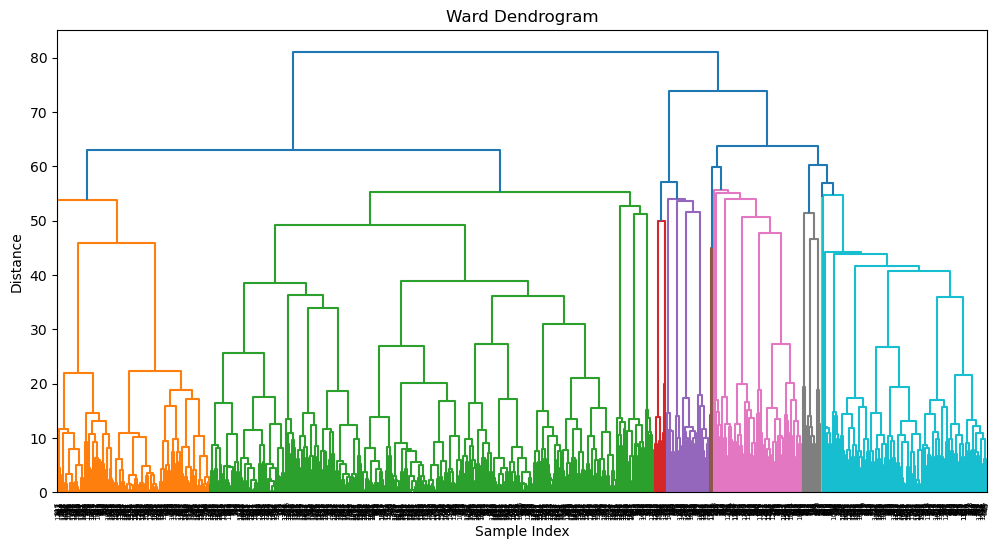

Cluster 1: Positive Rate: 0.05 Cluster Size: 235


KeyError: 79

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(data_scaled, method='ward')  # 'ward' is just one of the linkage methods
plt.figure(figsize=(12, 6))
name = 'Ward Dendrogram'
plt.title(name)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

num_clusters = 10  # Set the number of clusters you want
labels = fcluster(Z, num_clusters, criterion='maxclust')


for cluster_num in range(1, num_clusters + 1):
    cluster_indices = np.where(labels == cluster_num)[0]
    total_records = len(cluster_indices)
    positive_count = sum(1 for idx in cluster_indices if diagnosis[idx] == 1)
    positive_rate = positive_count / total_records if total_records != 0 else 0
    print(f"Cluster {cluster_num}: Positive Rate: {positive_rate:.2f} Cluster Size: {total_records}")


## Naive Bayes Classifier (Complement and Multinomial)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB

# Complement Naive Bayes is well suited to imbalanced data sets, and was designed to correct the assumptions
# made by the standard Multionmial NB classifier.

features = data.drop('Diagnosis', axis=1)
diagnosis = data['Diagnosis']
#print(features)
#print(diagnosis)

cnb = ComplementNB()
acc = 0
prec = 0
rec = 0

for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(features, diagnosis, test_size=0.2, random_state=5)
    cnb = cnb.fit(X_train, Y_train)
    preds = cnb.predict(X_test)

    acc += accuracy_score(Y_test, preds)
    prec += precision_score(Y_test, preds)
    rec += recall_score(Y_test, preds)

print("Complementary NB results")
print("Average accuracy:", acc/5)
print("Average precision:", prec/5)
print("Average recall:", rec/5)
print()

# multinomial

mnb = MultinomialNB()
acc = 0
prec = 0
rec = 0

for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(features, diagnosis, test_size=0.2, random_state=5)
    mnb = mnb.fit(X_train, Y_train)
    preds = mnb.predict(X_test)

    acc += accuracy_score(Y_test, preds)
    prec += precision_score(Y_test, preds)
    rec += recall_score(Y_test, preds)

print("Multinomial NB results")
print("Average accuracy:", acc/5)
print("Average precision:", prec/5)
print("Average recall:", rec/5)

Complementary NB results
Average accuracy: 0.8041958041958042
Average precision: 0.2166666666666667
Average recall: 0.5909090909090909

Multinomial NB results
Average accuracy: 0.902097902097902
Average precision: 0.3333333333333333
Average recall: 0.2727272727272727


## Association analysis/Apriori